In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [73]:
headerList = ['EventID', 'Path length (mm)', 'step length (mm)', 'Loss Energy (MeV)', 'Kinetic Energy (MeV)']

originalData = pd.read_csv('Particle_energy_nt_Step.csv', skiprows=9, names=headerList)
processedData = pd.DataFrame(columns=headerList)

In [74]:
originalData.head()

,EventID,Path length (mm),step length (mm),Loss Energy (MeV),Kinetic Energy (MeV)
0,1,0.000434,0.000434,0.000014,5.48999
1,1,0.064719,0.064285,0.008499,5.48047
2,1,0.124236,0.059518,0.006704,5.47249
3,1,0.141714,0.017477,0.001018,5.46851
4,1,0.220866,0.079152,0.007975,5.45886


In [75]:
for i in range(len(originalData)):
    if originalData['EventID'][i] == 1:
        processedData = processedData.append(originalData.iloc[i], ignore_index=True)

In [76]:
processedData.head()

,EventID,Path length (mm),step length (mm),Loss Energy (MeV),Kinetic Energy (MeV)
0,1.0,0.000434,0.000434,0.000014,5.48999
1,1.0,0.064719,0.064285,0.008499,5.48047
2,1.0,0.124236,0.059518,0.006704,5.47249
3,1.0,0.141714,0.017477,0.001018,5.46851
4,1.0,0.220866,0.079152,0.007975,5.45886


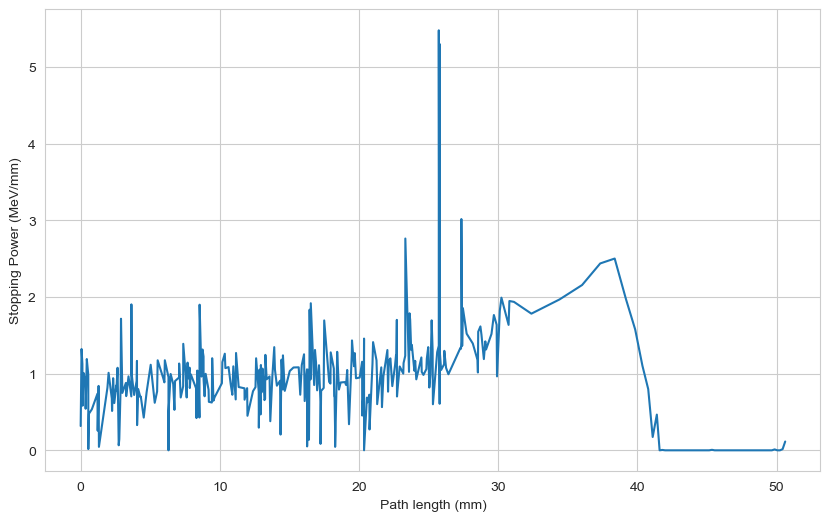

In [77]:
# plot data
# x = Path length (mm)
# y = Stopping Power (MeV/mm)
# you need to calculate the stopping power from the energy loss and step length
# stopping power = energy loss / step length

plt.figure(figsize=(10, 6))
X = processedData['Path length (mm)']
Y = 10 * processedData['Loss Energy (MeV)'] / processedData['step length (mm)']

sns.set_style('whitegrid')
ax = sns.lineplot(x=X, y=Y, data=processedData)
ax.set(xlabel='Path length (mm)', ylabel='Stopping Power (MeV/cm)')
plt.show()

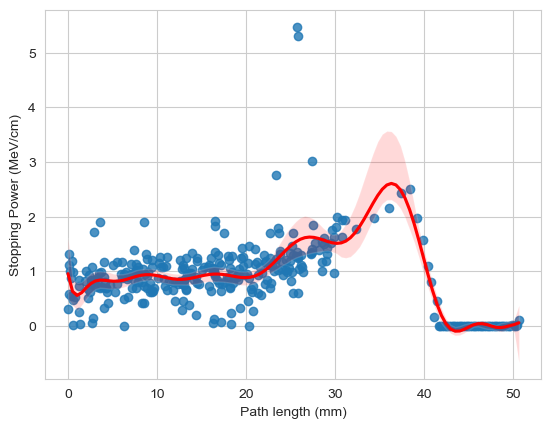

In [78]:
ax1 = sns.regplot(x=X, y=Y, data=processedData, order=1, line_kws={'color': 'red'})
ax1.set(xlabel='Path length (mm)', ylabel='Stopping Power (MeV/cm)')
plt.show()